## El tratamiento de las variables categoricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [10]:
feature_cols = ["Monthly Income", "Transaction Time",
               "Gender_Female","Gender_Male",
               "City_Tier 1","City_Tier 2","City_Tier 3",
               "Record"]

In [11]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [12]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [14]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [15]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.41713030137362 + 'Montly Income' * 0.14753898049205738 +
    'Transaction Time' * 0.15494612549589545 + 'Gender_Female' * -131.02501325554567 +
    'Gender_Male' * 131.0250132555456  + 'City_Tier 1' * 76.76432601049527 + 
    'City_Tier 2' * 55.138974309232474 + 'City_Tier 3' * -131.9033003197278 +
    'Record' * 772.2334457445648

In [16]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time'] * 0.15494612549589545 + df_new['Gender_Female'] * -131.02501325554567 + df_new['Gender_Male'] * 131.0250132555456 + df_new['City_Tier 1'] * 76.76432601049527 + df_new['City_Tier 2'] * 55.138974309232474 + df_new['City_Tier 3'] * -131.9033003197278 + df_new['Record'] * 772.2334457445648

In [17]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [18]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"]) **2)

In [19]:
SSD

1517733985.3408163

In [20]:
RSE = np.sqrt(SSD / (len(df_new) - len(feature_cols) - 1))
RSE

803.1318809818165

In [21]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [22]:
error = RSE / sales_mean
error * 100

13.031135680294161

In [23]:
df_new["prediction_auto"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [24]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction_auto
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


##  Eliminar variables dummies rebundantes

In [25]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender

,Gender_Male
0,0
1,0
2,1
3,0
4,0
...,...
2357,1
2358,1
2359,0
2360,0


In [26]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [27]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [28]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male" , "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.intercept_

-133.67781754642056

In [30]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [31]:
lm.score(X,Y)

0.9179923586131016

# Transformacion de variables para conseguir una relacion no lineal

In [32]:
import pandas as pd

In [33]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'CV vs MPG')

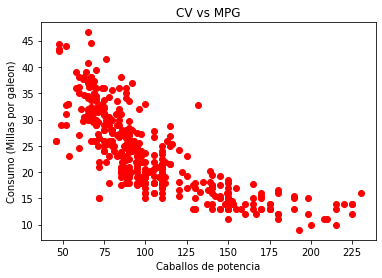

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (Millas por galeon)")
plt.title("CV vs MPG")

# Modelo de regresion lineal
* Modelo = a + b * horsepower


In [35]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X[:,np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

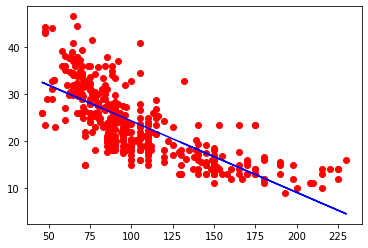

In [36]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X[:,np.newaxis]),color="blue")

In [37]:
lm.score(X[:,np.newaxis],Y)

0.574653340645025

In [38]:
SSD = np.sum((Y - lm.predict(X[:,np.newaxis]))**2)
RSE = np.sqrt(SSD / (len(X[:,np.newaxis]) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD,RSE,error

(10315.75196006092, 5.046879480825511, 0.21462773361633458)

# Modelo de regresion cuadratico
* mpg = a + b * horsepower ** 2

In [39]:
X_data = X ** 2
X_data = X_data[:,np.newaxis]

In [40]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.score(X_data,Y)

0.4849887034823205

In [42]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data) - 1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD,RSE,error

(12490.350340501926, 5.553410772769817, 0.236168898529981)

### Modelo de regresion lineal y cuadratico
* mpg = a + b * horsepower + c * horsepower ** 2

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [44]:
poly = PolynomialFeatures(degree=2)


In [45]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [46]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.score(X_data,Y)

0.6439066584257469

In [48]:
lm.intercept_

55.026192447080355

In [49]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434 hp + 0.00112615 ** hp

In [64]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print(lm.score(X_data,Y))
    print(regresion_validation(lm,X_data,Y))

0.6439066584257469
(8636.180643524502, 4.61778115803654, 23.51457286432162, 19.63795466190689)
0.6444678885560744
(8622.56936742855, 4.614140736300908, 23.51457286432162, 19.622473106036676)
0.6467674189704502
(8566.799832491353, 4.5991947315797574, 23.51457286432162, 19.55891250126878)
0.6547512489366876
(8373.171393636556, 4.546921735442387, 23.51457286432162, 19.336612073193884)


In [56]:
def regresion_validation(lm,X_data,Y):
    SSD = np.sum((Y - lm.predict(X_data))**2)
    RSE = np.sqrt(SSD / (len(X_data) - 1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    return SSD,RSE,y_mean,error*100

19.336612073193884

## El problema de los outliers

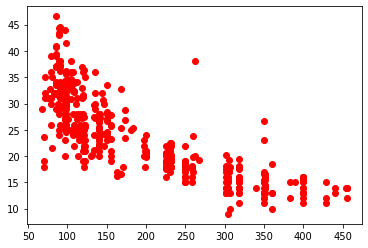

In [66]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")

In [72]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm.score(X,Y)

0.6261049762826918

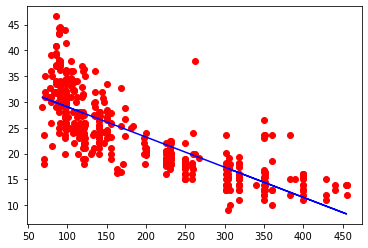

In [79]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color= "blue")

In [81]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [83]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [84]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [86]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lm.score(X,Y)

0.6466514317531822

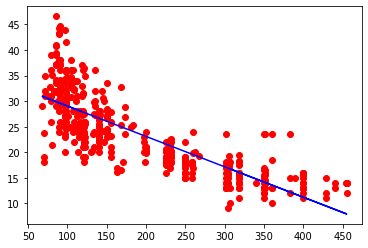

In [88]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color= "blue")